# <span style="color:blue">Evaluating Sequence Learning Models for Identifying Hate Speech using Explainable AI - Model performance comparison notebook</span>

## Model Performance Comparison


Author: Amir Mozahebi <br>
Thesis: Evaluating Sequence Learning Models for Identifying Hate Speech using Explainable AI

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.models import Model
import keras_tuner
from keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import pandas as pd

In [2]:
%store -r sequenceLength
%store -r vocabSize
%store -r paddedTrainSequences
%store -r trainLabels
%store -r paddedTestSequences
%store -r validationSet
%store -r testLabels
%store -r tokenizer
%store -r word_index

In [3]:
trainLabels = tf.keras.utils.to_categorical(trainLabels, num_classes=3)
testLabels_backup = testLabels
testLabels = tf.keras.utils.to_categorical(testLabels, num_classes=3)

In [4]:
def plotConfusionMatrix(cm, model_name):
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}\n" for v1, v2 in
              zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(3,3)

    ax = sns.heatmap(cm, annot=labels, fmt="",cmap='Blues')

    ax.set_title('Confusion Matrix \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values \n');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Hate Speech','Offensive', 'Neither'])
    ax.yaxis.set_ticklabels(['Hate Speech','Offensive', 'Neither'])

    ## Display the visualization of the Confusion Matrix.
    #plt.savefig(''+model_name+'_confusion_matrix.png', dpi=180)
    plt.show()

In [5]:
def plotModelMetrics(model, model_name):
    y_pred = model.predict(paddedTestSequences)
    cm = confusion_matrix(testLabels.argmax(axis=1), y_pred.argmax(axis=1))
    test_predictions = np.argmax(y_pred, axis=-1)
    plotConfusionMatrix(cm, model_name)
    print(classification_report(testLabels_backup, test_predictions, digits=4))

## ANN Model

In [6]:
model = keras.models.load_model('../models/ann_models/ann_model_3')

Metal device set to: Apple M1 Pro


2023-01-19 11:55:53.199690: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-19 11:55:53.199803: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
tf.keras.utils.plot_model(model, to_file="ann_best_model.pdf", show_shapes=True)

 70/338 [=====>........................] - ETA: 0s

2023-01-19 11:55:53.541240: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-19 11:55:53.583577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


338/338 [==============================] - 1s 1ms/step


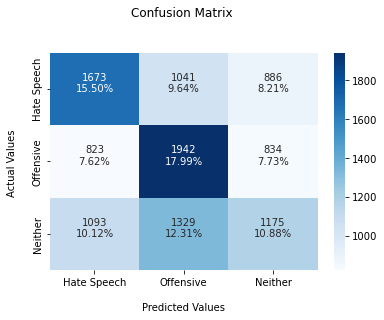

              precision    recall  f1-score   support

           0     0.4661    0.4647    0.4654      3600
           1     0.4504    0.5396    0.4910      3599
           2     0.4059    0.3267    0.3620      3597

    accuracy                         0.4437     10796
   macro avg     0.4408    0.4437    0.4395     10796
weighted avg     0.4408    0.4437    0.4395     10796



In [8]:
plotModelMetrics(model, "ann")

## RNN Model

In [10]:
model = keras.models.load_model('../models/rnn_models/rnn_model_2')

Metal device set to: Apple M1 Pro


2023-01-23 15:01:38.317373: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-23 15:01:38.317953: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
tf.keras.utils.plot_model(model, to_file="rnn_best_model.pdf", show_shapes=True)

  1/338 [..............................] - ETA: 49s

2023-01-23 15:01:39.231407: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-23 15:01:39.295027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


338/338 [==============================] - 10s 28ms/step


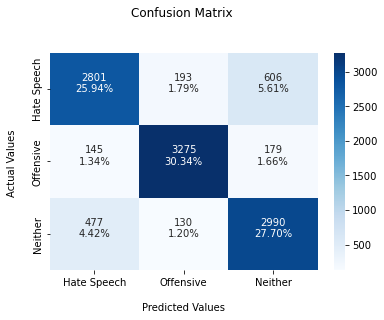

              precision    recall  f1-score   support

           0     0.8183    0.7781    0.7977      3600
           1     0.9102    0.9100    0.9101      3599
           2     0.7921    0.8312    0.8112      3597

    accuracy                         0.8398     10796
   macro avg     0.8402    0.8398    0.8396     10796
weighted avg     0.8402    0.8398    0.8396     10796



In [12]:
plotModelMetrics(model, "rnn")

In [17]:
wrong = returnWrongPredictions(model)

338/338 [==============================] - 10s 28ms/step


In [18]:
wrong

array([[  22,    2,  386, ...,    0,    0,    0],
       [   1,  109,  825, ...,    0,    0,    0],
       [  10, 2141, 1162, ...,    0,    0,    0],
       ...,
       [ 199,  467,   32, ...,    0,    0,    0],
       [ 238,   27, 4763, ...,    0,    0,    0],
       [ 718,   17,    8, ...,    0,    0,    0]], dtype=int32)

## LSTM Model

In [12]:
model = keras.models.load_model('../models/lstm_models/lstm_model_2')

In [13]:
tf.keras.utils.plot_model(model, to_file="lstm_best_model.pdf", show_shapes=True)

 12/338 [>.............................] - ETA: 1s  

2023-01-19 11:56:05.792773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-19 11:56:05.835661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


338/338 [==============================] - 2s 4ms/step


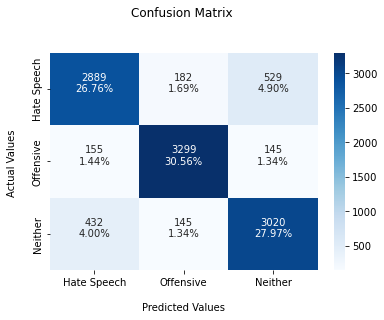

              precision    recall  f1-score   support

           0     0.8311    0.8025    0.8166      3600
           1     0.9098    0.9166    0.9132      3599
           2     0.8175    0.8396    0.8284      3597

    accuracy                         0.8529     10796
   macro avg     0.8528    0.8529    0.8527     10796
weighted avg     0.8528    0.8529    0.8527     10796



In [14]:
plotModelMetrics(model,"lstm")

## GRU Model

In [15]:
model = keras.models.load_model('../models/gru_models/gru_model_1')

In [16]:
tf.keras.utils.plot_model(model, to_file="gru_best_model.pdf", show_shapes=True)

 10/338 [..............................] - ETA: 1s 

2023-01-19 11:56:08.651520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-19 11:56:08.686800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


338/338 [==============================] - 2s 6ms/step


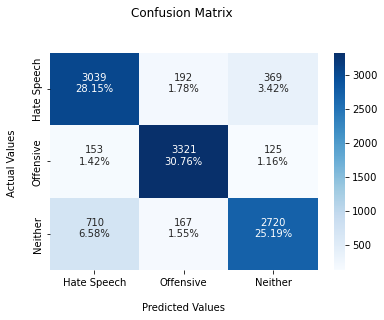

              precision    recall  f1-score   support

           0     0.7788    0.8442    0.8102      3600
           1     0.9024    0.9228    0.9125      3599
           2     0.8463    0.7562    0.7987      3597

    accuracy                         0.8411     10796
   macro avg     0.8425    0.8410    0.8405     10796
weighted avg     0.8425    0.8411    0.8405     10796



In [17]:
plotModelMetrics(model,"gru")